In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# 로그 데이터 포맷 맞춰두기 필요
"log_date_format": "YYYY-MM-DD HH:mm:ss.SSS"

# A Worker (두개이상은 아래아래 코드블록을 참고)

2021-11-15 16:46:01
2021-11-15 16:46:01.100000
2021-11-15 16:46:01.200000
2021-11-15 16:46:01.300000
2021-11-15 16:46:01.400000
2021-11-15 16:46:01.500000
2021-11-15 16:46:01.600000
2021-11-15 16:46:01.700000
2021-11-15 16:46:01.800000
2021-11-15 16:46:01.900000
2021-11-15 16:46:02
2021-11-15 16:46:02.100000
2021-11-15 16:46:02.200000
2021-11-15 16:46:02.300000
2021-11-15 16:46:02.400000
2021-11-15 16:46:02.500000
2021-11-15 16:46:02.600000
2021-11-15 16:46:02.700000
2021-11-15 16:46:02.800000
2021-11-15 16:46:02.900000
2021-11-15 16:46:03
2021-11-15 16:46:03.100000
2021-11-15 16:46:03.200000
2021-11-15 16:46:03.300000
2021-11-15 16:46:03.400000
2021-11-15 16:46:03.500000
2021-11-15 16:46:03.600000
2021-11-15 16:46:03.700000
2021-11-15 16:46:03.800000
2021-11-15 16:46:03.900000
2021-11-15 16:46:04
2021-11-15 16:46:04.100000
2021-11-15 16:46:04.200000
2021-11-15 16:46:04.300000
2021-11-15 16:46:04.400000
2021-11-15 16:46:04.500000
2021-11-15 16:46:04.600000
2021-11-15 16:46:04.700000
20

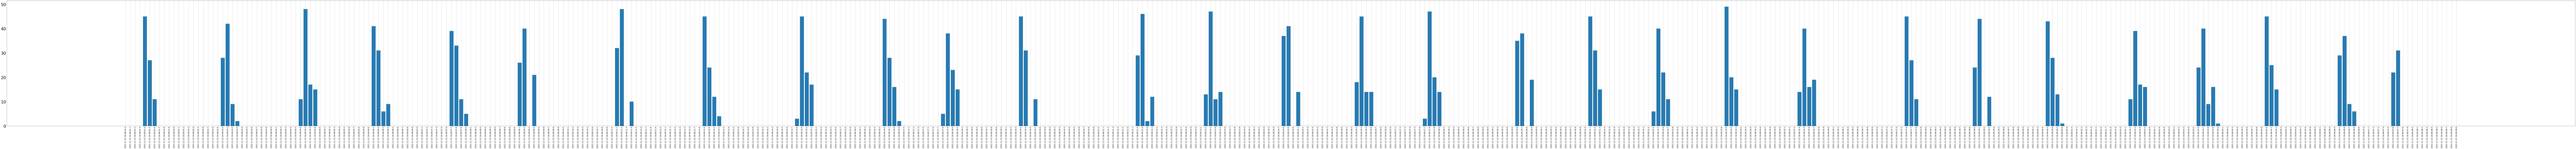

In [3]:
worker1 = pd.read_excel('211115sendMessage.xlsx')

#100ms 단위로 타임라인 스탬프 만들기
start = datetime.datetime(2021, 11, 15, 16, 46, 1)
end = datetime.datetime(2021, 11, 15, 16, 46, 49)
temp = start
timeline = []
while temp < end:
    timeline.append(temp)
    temp = temp + datetime.timedelta(milliseconds=100)

#100ms별 count
worker1_timeline = worker1['시각']
worker1_timeline_100ms = []
for i in worker1_timeline:
    strtemp = str(i)
    worker1_timeline_100ms.append(strtemp[0:21])
    
count = 0
pointer = ''
x_worker1 = []
y_worker1_count = []
for i in worker1_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker1.append(pointer)
        y_worker1_count.append(count)
        count = 0
        count += 1
    else:
        count += 1
        
timeline_str = []
for i in timeline:
    timeline_str.append(str(i))
    
timeline_worker = []
for i in timeline_str:
    if len(i)<20:
        timeline_worker.append(str(i) + ".0")
    else :
        timeline_worker.append(str(i)[0:21])
        
del y_worker1_count[0]
y_worker1_count.append(0)

df_worker1 = pd.DataFrame([ x for x in zip(x_worker1,y_worker1_count)])

count_with_zero = []
for i in timeline_worker:
    if (df_worker1[0] == i).any():
        target_count = df_worker1.loc[df_worker1[0] == i].iloc[0][1]
        count_with_zero.append(target_count)
    else:
        count_with_zero.append(0)

x_worker1 = timeline_worker
y_worker1_count = count_with_zero

fig_worker = plt.gcf()
fig_worker.set_size_inches(400, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker1, y_worker1_count)
plt.savefig('one_worker.png', dpi=100)

# Two workers

In [ ]:
worker1 = pd.read_excel('211116sendMessage.xlsx')
worker2 = pd.read_excel('211116sendMessage_created.xlsx')

#100ms 단위로 타임라인 스탬프 만들기
start = datetime.datetime(2021, 11, 16, 11, 26, 55)
end = datetime.datetime(2021, 11, 16, 11, 28, 46)
temp = start
timeline = []
while temp < end:
    timeline.append(temp)
    temp = temp + datetime.timedelta(milliseconds=100)

###############################################
#100ms별 count
worker1_timeline = worker1['시각']
worker1_timeline_100ms = []
for i in worker1_timeline:
    strtemp = str(i)
    worker1_timeline_100ms.append(strtemp[0:21])
    
count = 0
pointer = ''
x_worker1 = []
y_worker1_count = []
for i in worker1_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker1.append(pointer)
        y_worker1_count.append(count)
        count = 0
        count += 1
    else:
        count += 1
        
timeline_str = []
for i in timeline:
    timeline_str.append(str(i))
    
timeline_worker = []
for i in timeline_str:
    if len(i)<20:
        timeline_worker.append(str(i) + ".0")
    else :
        timeline_worker.append(str(i)[0:21])
        
del y_worker1_count[0]
y_worker1_count.append(0)

df_worker1 = pd.DataFrame([ x for x in zip(x_worker1,y_worker1_count)])

count_with_zero_worker1 = []
for i in timeline_worker:
    if (df_worker1[0] == i).any():
        target_count = df_worker1.loc[df_worker1[0] == i].iloc[0][1]
        count_with_zero_worker1.append(target_count)
    else:
        count_with_zero_worker1.append(0)

x_worker1 = timeline_worker
y_worker1_count = count_with_zero_worker1


### 이 부분만 여러개 복사하면 워커 개수 추가 가능
###############################################
worker2_timeline = worker2['시각']
worker2_timeline_100ms = []
for i in worker2_timeline:
    strtemp = str(i)
    worker2_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker2 = []
y_worker2_count = []
for i in worker2_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker2.append(pointer)
        y_worker2_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker2_count[0]
y_worker2_count.append(0)
df_worker2 = pd.DataFrame([ x for x in zip(x_worker2,y_worker2_count)])

count_with_zero_worker2 = []
for i in timeline_worker:
    if (df_worker2[0] == i).any():
        target_count = df_worker2.loc[df_worker2[0] == i].iloc[0][1]
        count_with_zero_worker2.append(target_count)
    else:
        count_with_zero_worker2.append(0)

x_worker2 = timeline_worker
y_worker2_count = count_with_zero_worker2
###############################################





fig_worker = plt.gcf()
fig_worker.set_size_inches(400, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker1, y_worker1_count)
plt.bar(x_worker2, y_worker2_count)
plt.savefig('two_workers.png', dpi=100)

### Three workers

KeyboardInterrupt: 

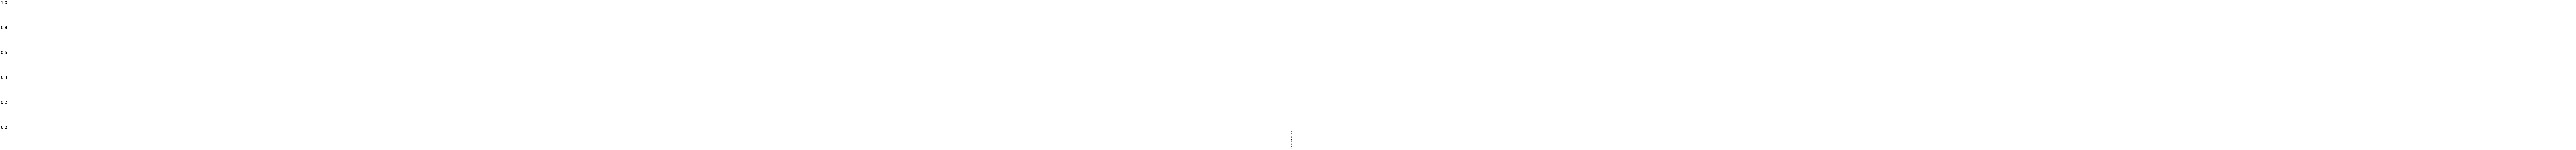

In [18]:
worker1 = pd.read_excel('211116sendMessage.xlsx')
worker2 = pd.read_excel('211116sendMessage_end.xlsx')
worker3 = pd.read_excel('211116sendMessage_begin.xlsx')

#100ms 단위로 타임라인 스탬프 만들기
start = datetime.datetime(2021, 11, 16, 16, 59, 48)
end = datetime.datetime(2021, 11, 16, 17, 4, 44)
temp = start
timeline = []
while temp < end:
    timeline.append(temp)
    temp = temp + datetime.timedelta(milliseconds=100)

###############################################
#100ms별 count
worker1_timeline = worker1['시각']
worker1_timeline_100ms = []
for i in worker1_timeline:
    strtemp = str(i)
    worker1_timeline_100ms.append(strtemp[0:21])
    
count = 0
pointer = ''
x_worker1 = []
y_worker1_count = []
for i in worker1_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker1.append(pointer)
        y_worker1_count.append(count)
        count = 0
        count += 1
    else:
        count += 1
        
timeline_str = []
for i in timeline:
    timeline_str.append(str(i))
    
timeline_worker = []
for i in timeline_str:
    if len(i)<20:
        timeline_worker.append(str(i) + ".0")
    else :
        timeline_worker.append(str(i)[0:21])
        
del y_worker1_count[0]
y_worker1_count.append(0)

df_worker1 = pd.DataFrame([ x for x in zip(x_worker1,y_worker1_count)])

count_with_zero_worker1 = []
for i in timeline_worker:
    if (df_worker1[0] == i).any():
        target_count = df_worker1.loc[df_worker1[0] == i].iloc[0][1]
        count_with_zero_worker1.append(target_count)
    else:
        count_with_zero_worker1.append(0)

x_worker1 = timeline_worker
y_worker1_count = count_with_zero_worker1


### 이 부분만 여러개 복사하면 워커 개수 추가 가능
###############################################
worker2_timeline = worker2['시각']
worker2_timeline_100ms = []
for i in worker2_timeline:
    strtemp = str(i)
    worker2_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker2 = []
y_worker2_count = []
for i in worker2_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker2.append(pointer)
        y_worker2_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker2_count[0]
y_worker2_count.append(0)
df_worker2 = pd.DataFrame([ x for x in zip(x_worker2,y_worker2_count)])

count_with_zero_worker2 = []
for i in timeline_worker:
    if (df_worker2[0] == i).any():
        target_count = df_worker2.loc[df_worker2[0] == i].iloc[0][1]
        count_with_zero_worker2.append(target_count)
    else:
        count_with_zero_worker2.append(0)

x_worker2 = timeline_worker
y_worker2_count = count_with_zero_worker2
###############################################


### 이 부분만 여러개 복사하면 워커 개수 추가 가능
###############################################
worker3_timeline = worker3['시각']
worker3_timeline_100ms = []
for i in worker3_timeline:
    strtemp = str(i)
    worker3_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker3 = []
y_worker3_count = []
for i in worker3_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker3.append(pointer)
        y_worker3_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker3_count[0]
y_worker3_count.append(0)
df_worker3 = pd.DataFrame([ x for x in zip(x_worker3,y_worker3_count)])

count_with_zero_worker3 = []
for i in timeline_worker:
    if (df_worker3[0] == i).any():
        target_count = df_worker3.loc[df_worker3[0] == i].iloc[0][1]
        count_with_zero_worker3.append(target_count)
    else:
        count_with_zero_worker3.append(0)

x_worker3 = timeline_worker
y_worker3_count = count_with_zero_worker3
###############################################





fig_worker = plt.gcf()
fig_worker.set_size_inches(400, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker1, y_worker1_count)
plt.bar(x_worker2, y_worker2_count)
plt.bar(x_worker3, y_worker3_count, alpha=0.5)
plt.savefig('300.png', dpi=100)




# so many workers

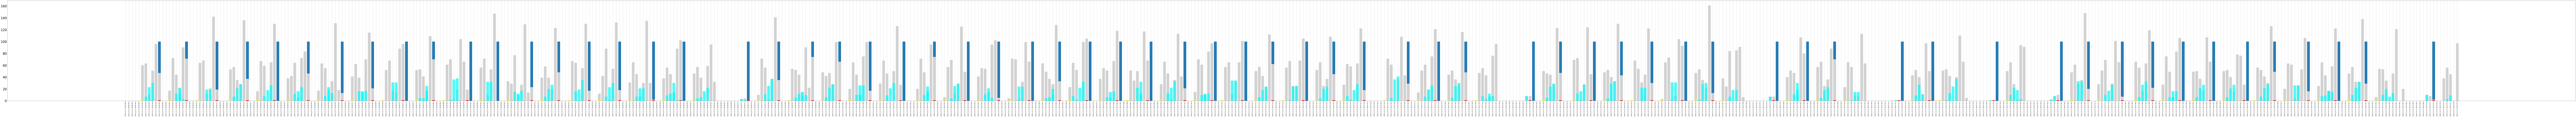

In [2]:
worker1 = pd.read_excel('17sendMessage_shortener_begin.xlsx')
worker2 = pd.read_excel('17sendMessage_shortener_end.xlsx')
worker3 = pd.read_excel('17sendMessage_begin.xlsx')
worker4 = pd.read_excel('17sendMessage_end.xlsx')
worker5 = pd.read_excel('17sendMessage.xlsx')
worker6 = pd.read_excel('17sendMessage_csp_begin.xlsx')
worker7 = pd.read_excel('17sendMessage_csp_end.xlsx')

#100ms 단위로 타임라인 스탬프 만들기
start = datetime.datetime(2021, 11, 17, 18, 46, 39)
end = datetime.datetime(2021, 11, 17, 18, 47, 48)
temp = start
timeline = []
while temp < end:
    timeline.append(temp)
    temp = temp + datetime.timedelta(milliseconds=100)

###############################################
#100ms별 count
worker1_timeline = worker1['시각']
worker1_timeline_100ms = []
for i in worker1_timeline:
    strtemp = str(i)
    worker1_timeline_100ms.append(strtemp[0:21])
    
count = 0
pointer = ''
x_worker1 = []
y_worker1_count = []
for i in worker1_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker1.append(pointer)
        y_worker1_count.append(count)
        count = 0
        count += 1
    else:
        count += 1
        
timeline_str = []
for i in timeline:
    timeline_str.append(str(i))
    
timeline_worker = []
for i in timeline_str:
    if len(i)<20:
        timeline_worker.append(str(i) + ".0")
    else :
        timeline_worker.append(str(i)[0:21])
        
del y_worker1_count[0]
y_worker1_count.append(0)

df_worker1 = pd.DataFrame([ x for x in zip(x_worker1,y_worker1_count)])

count_with_zero_worker1 = []
for i in timeline_worker:
    if (df_worker1[0] == i).any():
        target_count = df_worker1.loc[df_worker1[0] == i].iloc[0][1]
        count_with_zero_worker1.append(target_count)
    else:
        count_with_zero_worker1.append(0)

x_worker1 = timeline_worker
y_worker1_count = count_with_zero_worker1


### 이 부분만 여러개 복사하면 워커 개수 추가 가능
###############################################
worker2_timeline = worker2['시각']
worker2_timeline_100ms = []
for i in worker2_timeline:
    strtemp = str(i)
    worker2_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker2 = []
y_worker2_count = []
for i in worker2_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker2.append(pointer)
        y_worker2_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker2_count[0]
y_worker2_count.append(0)
df_worker2 = pd.DataFrame([ x for x in zip(x_worker2,y_worker2_count)])

count_with_zero_worker2 = []
for i in timeline_worker:
    if (df_worker2[0] == i).any():
        target_count = df_worker2.loc[df_worker2[0] == i].iloc[0][1]
        count_with_zero_worker2.append(target_count)
    else:
        count_with_zero_worker2.append(0)

x_worker2 = timeline_worker
y_worker2_count = count_with_zero_worker2
###############################################


### 이 부분만 여러개 복사하면 워커 개수 추가 가능
###############################################
worker3_timeline = worker3['시각']
worker3_timeline_100ms = []
for i in worker3_timeline:
    strtemp = str(i)
    worker3_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker3 = []
y_worker3_count = []
for i in worker3_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker3.append(pointer)
        y_worker3_count.append(count*100)
        count = 0
        count += 1
    else:
        count += 1

del y_worker3_count[0]
y_worker3_count.append(0)
df_worker3 = pd.DataFrame([ x for x in zip(x_worker3,y_worker3_count)])

count_with_zero_worker3 = []
for i in timeline_worker:
    if (df_worker3[0] == i).any():
        target_count = df_worker3.loc[df_worker3[0] == i].iloc[0][1]
        count_with_zero_worker3.append(target_count)
    else:
        count_with_zero_worker3.append(0)

x_worker3 = timeline_worker
y_worker3_count = count_with_zero_worker3
###############################################


### 이 부분만 여러개 복사하면 워커 개수 추가 가능
###############################################
worker4_timeline = worker4['시각']
worker4_timeline_100ms = []
for i in worker4_timeline:
    strtemp = str(i)
    worker4_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker4 = []
y_worker4_count = []
for i in worker4_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker4.append(pointer)
        y_worker4_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker4_count[0]
y_worker4_count.append(0)
df_worker4 = pd.DataFrame([ x for x in zip(x_worker4,y_worker4_count)])

count_with_zero_worker4 = []
for i in timeline_worker:
    if (df_worker4[0] == i).any():
        target_count = df_worker4.loc[df_worker4[0] == i].iloc[0][1]
        count_with_zero_worker4.append(target_count)
    else:
        count_with_zero_worker4.append(0)

x_worker4 = timeline_worker
y_worker4_count = count_with_zero_worker4
###############################################



###############################################
worker5_timeline = worker5['시각']
worker5_timeline_100ms = []
for i in worker5_timeline:
    strtemp = str(i)
    worker5_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker5 = []
y_worker5_count = []
for i in worker5_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker5.append(pointer)
        y_worker5_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker5_count[0]
y_worker5_count.append(0)
df_worker5 = pd.DataFrame([ x for x in zip(x_worker5,y_worker5_count)])

count_with_zero_worker5 = []
for i in timeline_worker:
    if (df_worker5[0] == i).any():
        target_count = df_worker5.loc[df_worker5[0] == i].iloc[0][1]
        count_with_zero_worker5.append(target_count)
    else:
        count_with_zero_worker5.append(0)

x_worker5 = timeline_worker
y_worker5_count = count_with_zero_worker5
###############################################


###############################################
worker6_timeline = worker6['시각']
worker6_timeline_100ms = []
for i in worker6_timeline:
    strtemp = str(i)
    worker6_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker6 = []
y_worker6_count = []
for i in worker6_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker6.append(pointer)
        y_worker6_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker6_count[0]
y_worker6_count.append(0)
df_worker6 = pd.DataFrame([ x for x in zip(x_worker6,y_worker6_count)])

count_with_zero_worker6 = []
for i in timeline_worker:
    if (df_worker6[0] == i).any():
        target_count = df_worker6.loc[df_worker6[0] == i].iloc[0][1]
        count_with_zero_worker6.append(target_count)
    else:
        count_with_zero_worker6.append(0)

x_worker6 = timeline_worker
y_worker6_count = count_with_zero_worker6
###############################################


###############################################
worker7_timeline = worker7['시각']
worker7_timeline_100ms = []
for i in worker7_timeline:
    strtemp = str(i)
    worker7_timeline_100ms.append(strtemp[0:21])
count = 0
pointer = ''
x_worker7 = []
y_worker7_count = []
for i in worker7_timeline_100ms:
    if i != pointer:
        pointer = i
        x_worker7.append(pointer)
        y_worker7_count.append(count)
        count = 0
        count += 1
    else:
        count += 1

del y_worker7_count[0]
y_worker7_count.append(0)
df_worker7 = pd.DataFrame([ x for x in zip(x_worker7,y_worker7_count)])

count_with_zero_worker7 = []
for i in timeline_worker:
    if (df_worker7[0] == i).any():
        target_count = df_worker7.loc[df_worker7[0] == i].iloc[0][1]
        count_with_zero_worker7.append(target_count)
    else:
        count_with_zero_worker7.append(0)

x_worker7 = timeline_worker
y_worker7_count = count_with_zero_worker7
###############################################





fig_worker = plt.gcf()
fig_worker.set_size_inches(500, 20)

plt.grid(True, axis='x')
plt.xticks(fontsize=14, rotation='vertical')
plt.yticks(fontsize=35)
plt.bar(x_worker3, y_worker3_count, edgecolor="skyblue") #sendMessage start
plt.bar(x_worker5, y_worker5_count, color='lightgrey') #mms req, res
plt.bar(x_worker6, y_worker6_count, color='aqua', alpha=0.7) #csp start
plt.bar(x_worker7, y_worker7_count, color='aqua', alpha=0.7) #csp end
plt.bar(x_worker1, y_worker1_count, color='green') #shortener begin
plt.bar(x_worker2, y_worker2_count, color='yellow') #shortener end
plt.bar(x_worker4, y_worker4_count, color='red') #sendMessage end
plt.savefig('200.png', dpi=100)


